# **Business Case: Yulu - Hypothesis Testing**

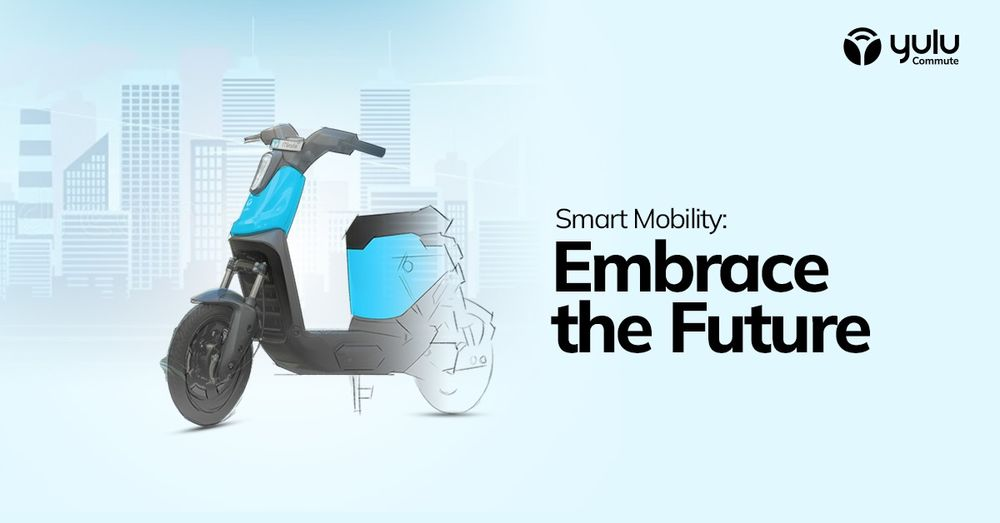

## **🔮Introduction**  

###🚴‍♂️ **About Yulu**

Yulu, India's leading micro-mobility service provider, offers a convenient and sustainable transportation solution through shared electric cycles. They aim to reduce traffic congestion and provide a user-friendly alternative for daily commutes. Yulu strategically places its cycles in various locations, including metro stations, bus stands, office spaces, and residential areas, making it accessible for first-and-last-mile connectivity.

###🎯 **Objective**

Yulu has experienced a recent decline in revenue, prompting them to investigate factors influencing the demand for their shared electric cycles in the Indian market. Understanding these factors will enable them to optimize their services and regain profitability.

###📂 **Dataset**

The provided dataset (`yulu_data.csv`) holds valuable information for analyzing factors impacting rental demand.

###🗃️ **Features of the dataset.**

| Feature     | Description                                                                 |
|:------------|:----------------------------------------------------------------------------|
| datetime    | Date and time of the rental                                                 |
| season      | Categorical variable representing the season (1: spring, 2: summer, 3: fall, 4: winter) |
| holiday     | Binary variable indicating whether it's a holiday (1) or not (0)            |
| workingday  | Binary variable indicating a workday (1) or non-workday (0) (including weekends and holidays) |
| weather     | Categorical variable representing weather conditions (1: Clear, 2: Mist/Cloudy, 3: Light precipitation, 4: Heavy precipitation) |
| temp        | Temperature in Celsius                                                      |
| atemp       | Feeling temperature in Celsius                                              |
| humidity    | Humidity percentage                                                         |
| windspeed   | Wind speed                                                                  |
| casual      | Number of casual user rentals                                               |
| registered  | Number of registered user rentals                                           |
| count       | Total number of bike rentals (casual + registered)                          |



###**📚 Import Necessary Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro, levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import kruskal
from statsmodels.formula.api import ols
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore')

###**📂 Loading the Dataset:**

In [ ]:
# Download the data
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089 -O bike_sharing.csv -q --show-progress

bike_sharing.csv    100%[===================>] 633.16K  --.-KB/s    in 0.05s   


In [ ]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("bike_sharing.csv")

# Display the first few rows of the DataFrame
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


##**1.🕵️‍♂️ Exploratory Data Analysis (EDA):**



**1A. Examine dataset structure, characteristics, and statistical summary.**

In [ ]:
#number of dimensions
df.ndim

2

In [ ]:
# The number of rows and columns given in the dataset
df.shape

(10886, 12)

In [ ]:
# The characteristics of all columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### **🔍 Insights**

*   The dataset contains holds valuable information for analyzing factors impacting `rental demand`.
*   The dataset consists of `10886` rows and `12` attributes.
*   The columns `"datetime"` have `object datatype`.
*   The columns `"season", "holiday", "workingday", "weather", "humidity" "casual", "registered" and "total_riders"` have `int datatype.`
*   The columns `"temp", "atemp" and "windspeed"` have `float datatype`.

**Data Type Conversion Required**
*   The data type of `datetime` should be in datetime format.
*   At the same time `season, holiday, workingday & weather` should in `category format` as they are categorical in nature




In [ ]:
# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.strftime('%B')
df['hour'] = df['datetime'].dt.hour

In [ ]:
# Convert 'season', 'holiday', 'workingday', 'weather' columns to object type
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

In [ ]:
# Verify the data types of the columns
df.dtypes

,0
datetime,datetime64[ns]
season,category
holiday,category
workingday,category
weather,category
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [ ]:
#statistical summary
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
datetime,10886,NaN,NaN,NaN,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
season,10886.0,4.0,4.0,2734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
holiday,10886.0,2.0,0.0,10575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,10886.0,2.0,1.0,7412.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather,10886.0,4.0,1.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,10886.0,NaN,NaN,NaN,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,NaN,NaN,NaN,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,NaN,NaN,NaN,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,NaN,NaN,NaN,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,NaN,NaN,NaN,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477


**1B. Identify missing values and perform Imputation using an appropriate method.**

In [ ]:
# Check for the missing values and find the number of missing values in each column
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [ ]:
# detect the missing values
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


### **🔍 Insights**

*   No missing values found

**1C. Identify and remove duplicate records.**

In [ ]:
# Checking for duplicate rows in the dataset
df.duplicated().sum()

0

### **🔍 Insights**

*   No duplicate records found

**1D. Analyze the distribution of Numerical & Categorical variables, separately**

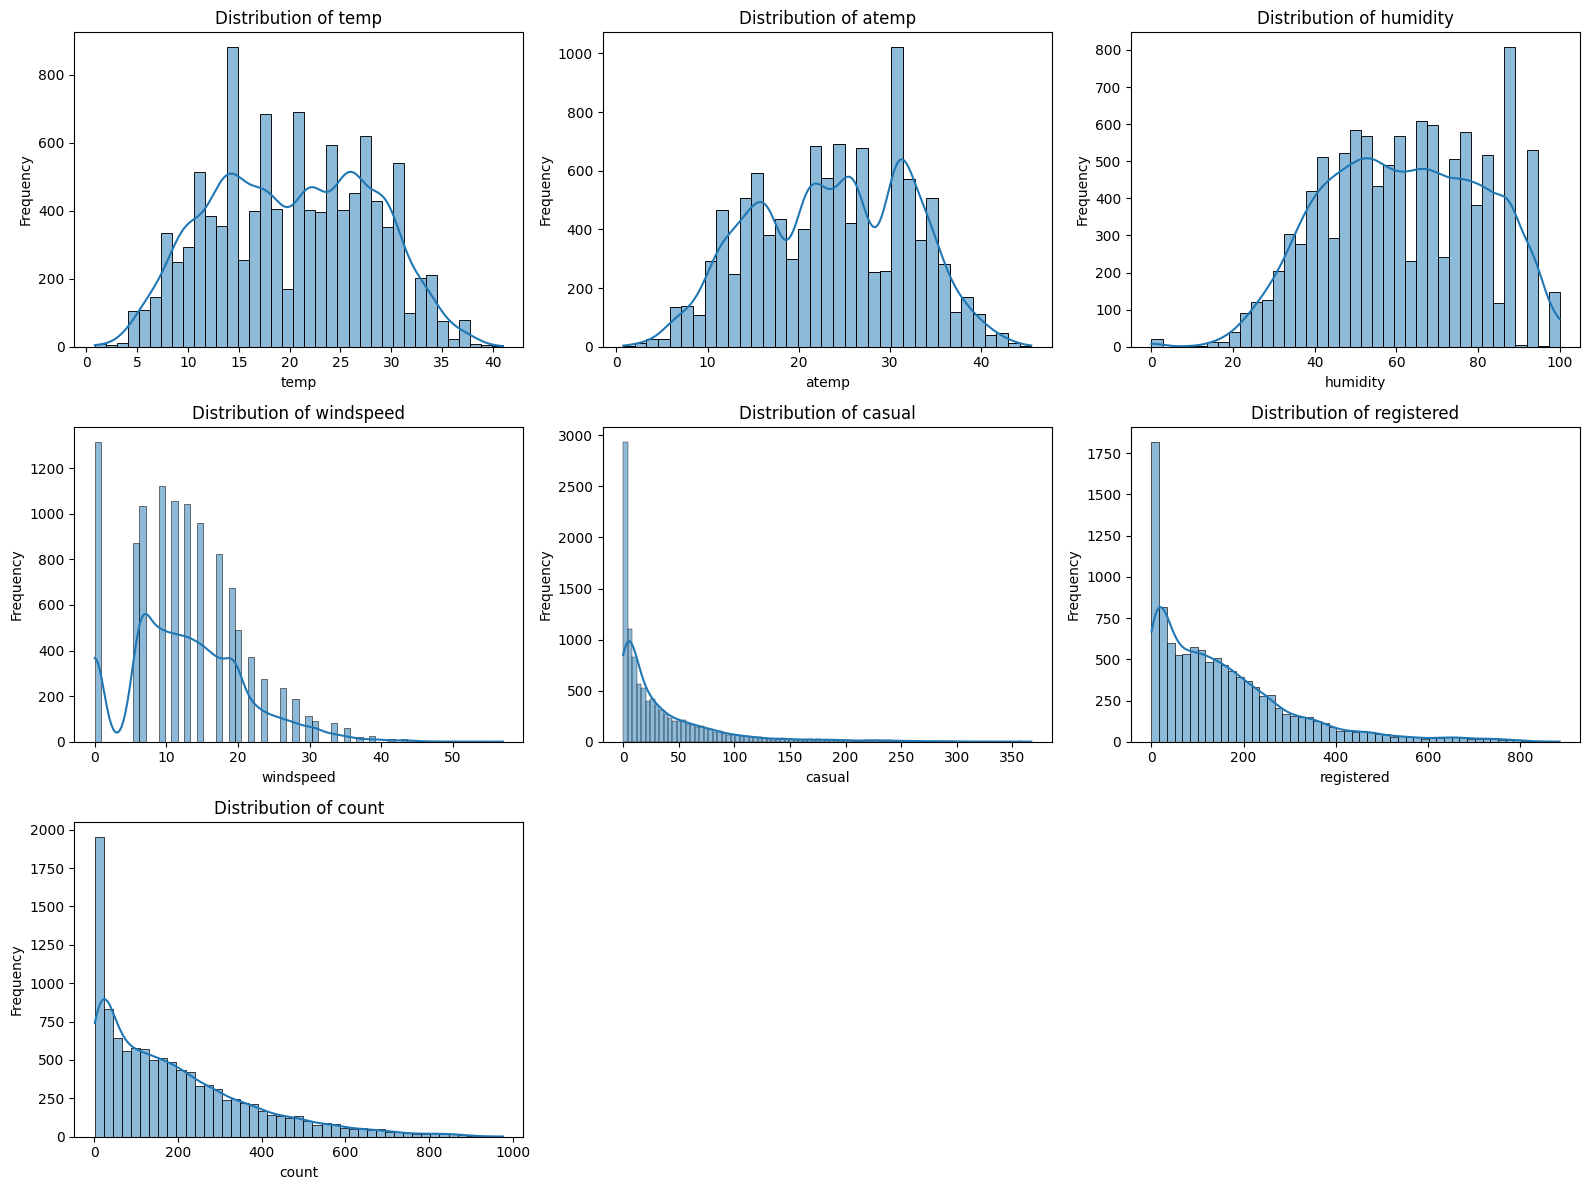

In [ ]:
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


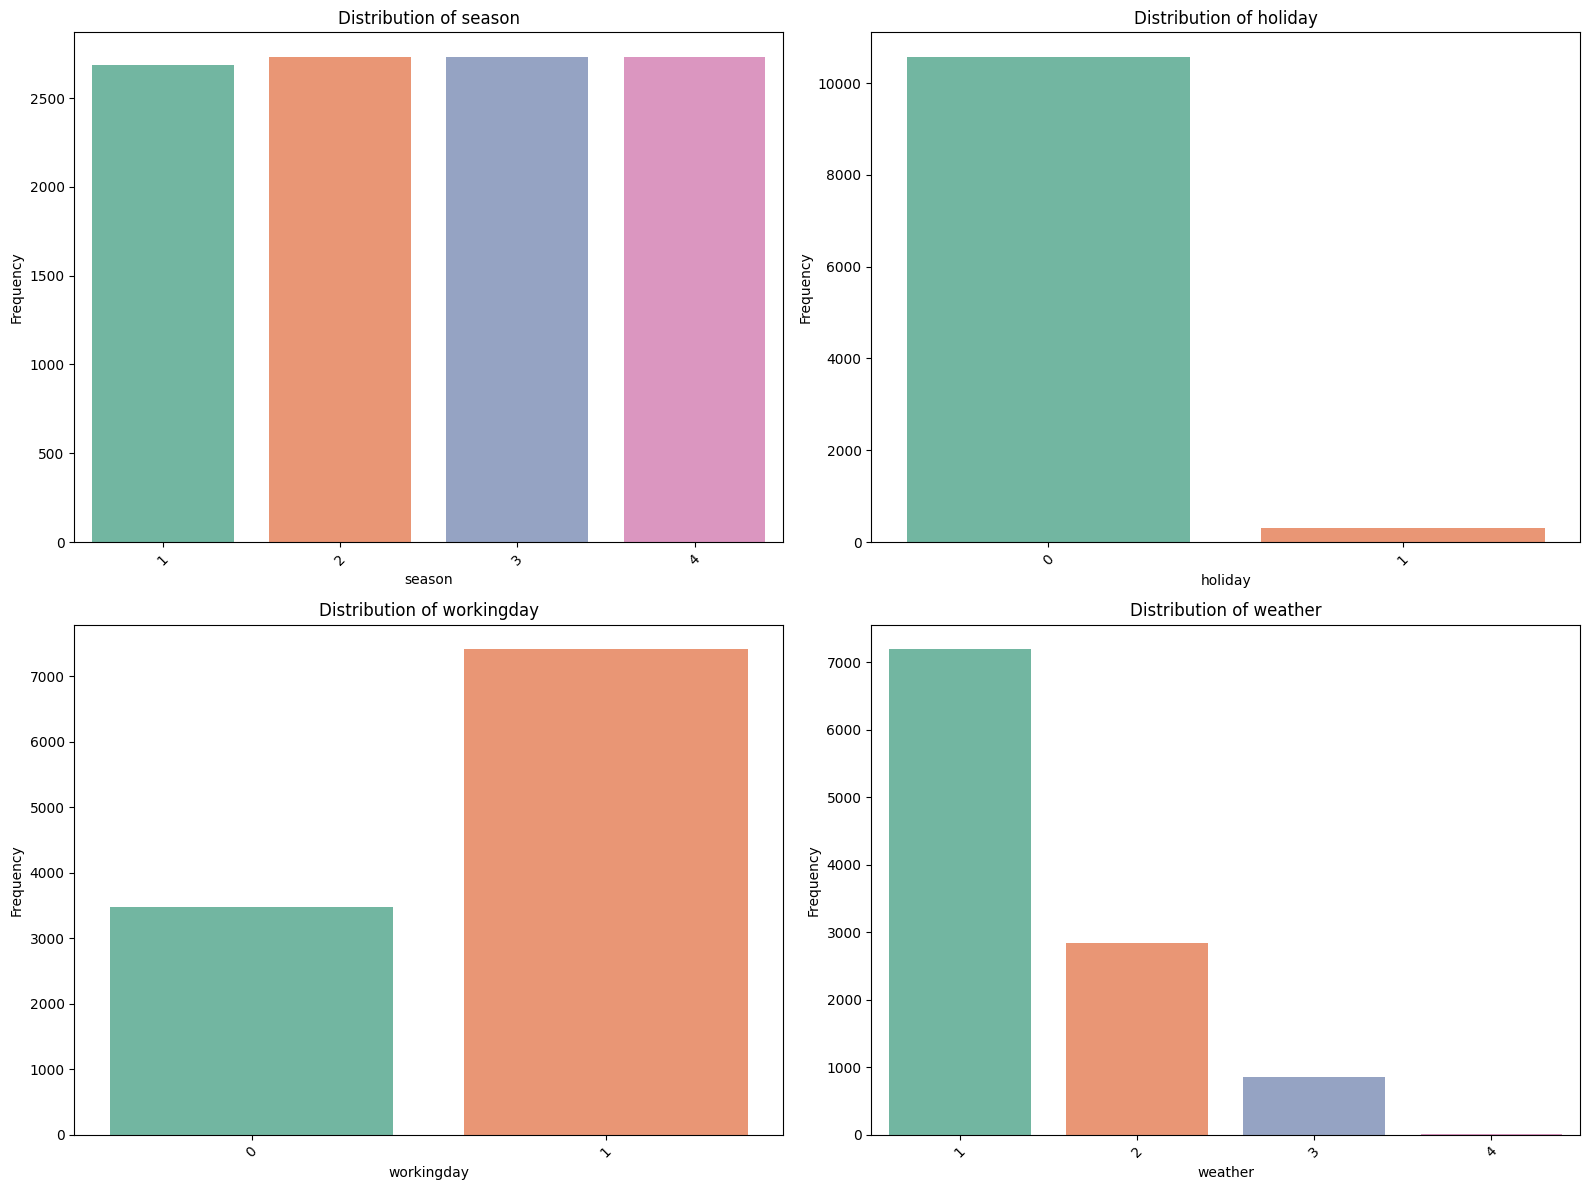

In [ ]:
categorical_features = ['season', 'holiday', 'workingday', 'weather']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i], palette="Set2")  # Added palette parameter
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **🔍 Insights**

**Categorical Variables**
1. **Season**:
   - The distribution of the 'season' variable shows that data is fairly evenly distributed across the four seasons. This indicates that the dataset covers all seasons without significant bias towards any particular one.

2. **Holiday**:
   - The 'holiday' variable has a skewed distribution with a significantly higher frequency of non-holidays compared to holidays. This suggests that the majority of the data points are from regular days rather than holidays.

3. **Working Day**:
   - The 'workingday' variable also shows a skewed distribution, with more data points on working days compared to non-working days. This could imply that the dataset is more representative of regular workdays.

4. **Weather**:
   - The 'weather' variable shows a varied distribution with different weather conditions. This indicates that the dataset includes a range of weather conditions, which could be useful for analyzing the impact of weather on the target variable.

**Numerical Variables**
1. **Temperature (temp)**:
   - The histogram for 'temp' shows a normal distribution with most values clustered around the mean. This suggests that temperature data is symmetrically distributed around the average temperature.

2. **Apparent Temperature (atemp)**:
   - Similar to 'temp', the 'atemp' variable also shows a normal distribution, indicating that the perceived temperature follows a similar pattern to the actual temperature.

3. **Humidity**:
   - The histogram for 'humidity' shows a right-skewed distribution, indicating that lower humidity levels are more common in the dataset.

4. **Windspeed**:
   - The 'windspeed' variable shows a left-skewed distribution, suggesting that higher wind speeds are less common in the dataset.

5. **Casual Users**:
   - The distribution of 'casual' users shows a right-skewed pattern, indicating that there are more days with fewer casual users.

6. **Registered Users**:
   - The 'registered' users variable shows a left-skewed distribution, suggesting that there are more days with a higher number of registered users.

7. **Count**:
   - The 'count' variable, representing the total number of bike rentals, shows a right-skewed distribution. This indicates that there are more days with a lower total count of bike rentals.

**Summary**
- **Categorical Variables**: The dataset is well-distributed across different seasons and weather conditions but is skewed towards non-holidays and working days.
- **Numerical Variables**: Most numerical variables show normal or skewed distributions, providing insights into the typical conditions and usage patterns in the dataset.

**E. Check for Outliers and deal with them accordingly.**

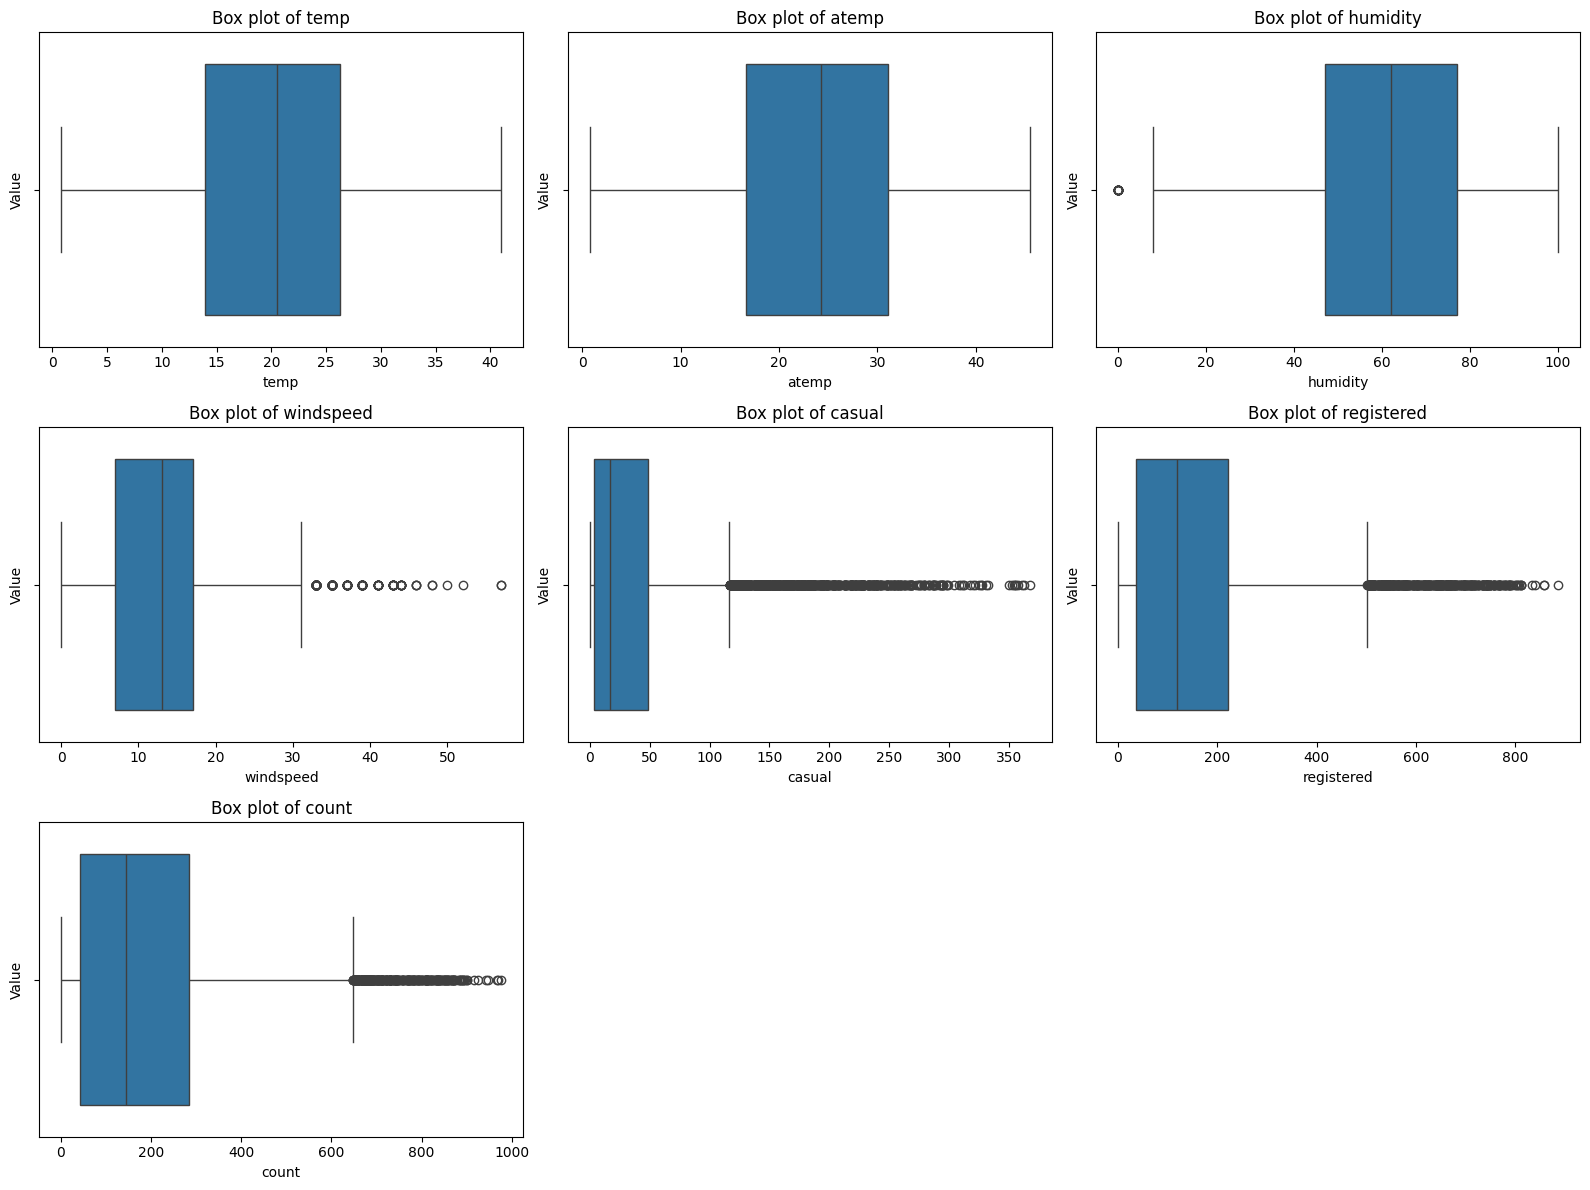

In [ ]:
# Plotting box plots to identify outliers
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Value')

# Hide any unused subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **🔍 Insights**

The data reveals that the features humidity, casual, registered, and count exhibit outliers.





In [ ]:
# Define the features with outliers
features_with_outliers = ['humidity', 'registered', 'count', 'windspeed']

# Function to clip outliers for a given feature
def clip_outliers(df, feature):
    minn = np.percentile(df[feature], 5)
    maxx = np.percentile(df[feature], 95)
    df[feature] = np.clip(df[feature], minn, maxx)

# Apply the clipping function to each feature
for feature in features_with_outliers:
    clip_outliers(df, feature)


In [ ]:
#Clip existing outliers
minn = np.percentile(df['casual'], 25)
maxx = np.percentile(df['casual'], 75)
df['casual'] = np.clip(df['casual'], minn, maxx)

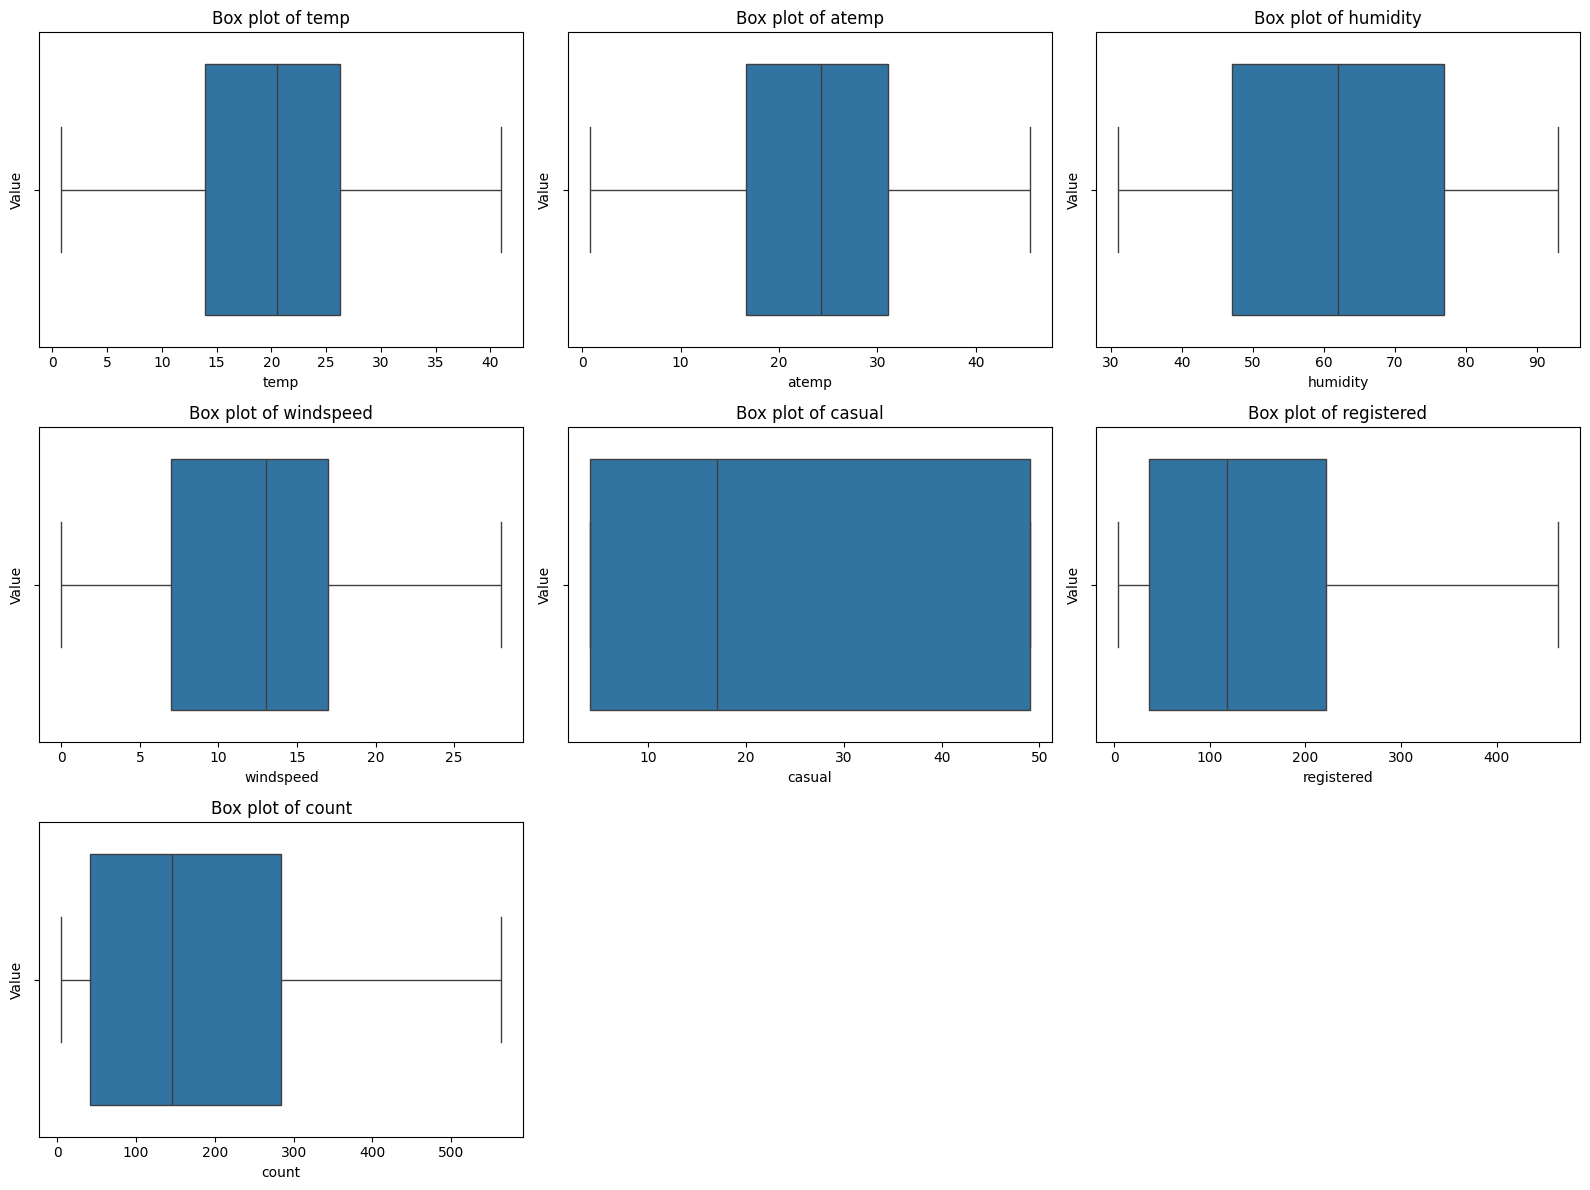

In [ ]:
# Verifying  outliers
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Value')

# Hide any unused subplots
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##**🔗 2. Try establishing a Relationship between the Dependent and Independent Variables.**


**2.1 Plot a Correlation Heatmap and draw insights.**

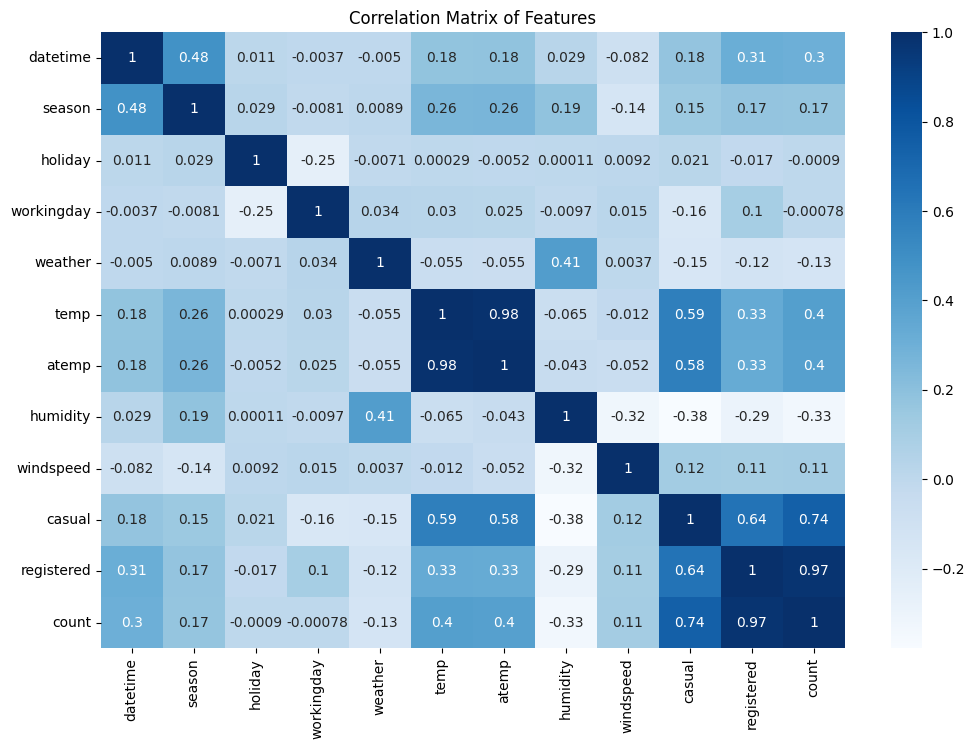

In [ ]:
# Creating the heatmap
fig, ax = plt.subplots(figsize=(12,8))
df_corr = sns.heatmap(df.drop(columns=['year','month','hour']).corr(),cmap='Blues', annot=True,ax=ax)
plt.title('Correlation Matrix of Features')
plt.show()

### 🔍 **Insights**

Based on the heatmap provided, here are some key insights for the Yulu business team:

1. **Temperature and Apparent Temperature**:
   - **High Positive Correlation**: The heatmap shows a very high positive correlation between 'temp' and 'atemp'. This indicates that both these variables move together, which is expected as they both measure temperature. For Yulu, this means that any strategies or promotions based on temperature data can reliably use either measure.

2. **User Types and Total Rentals**:
   - **Strong Positive Correlation**: Both 'casual' and 'registered' users have a strong positive correlation with the 'count' of total rentals. This suggests that increases in either casual or registered users directly lead to higher total rentals. Yulu can leverage this by targeting both user groups with tailored marketing campaigns to boost overall rentals.

3. **Humidity and Rentals**:
   - **Negative Correlation**: There is a notable negative correlation between 'humidity' and 'count'. Higher humidity levels are associated with lower bike rental counts. Yulu might consider offering discounts or promotions during high humidity periods to encourage more rentals.

4. **Weather Conditions**:
   - **Moderate Correlation**: The 'weather' variable shows moderate correlations with other factors like 'temp' and 'humidity'. Understanding how different weather conditions impact rentals can help Yulu optimize their fleet distribution and maintenance schedules.

5. **Seasonal Trends**:
   - **Positive Correlation**: The 'season' variable has a positive correlation with the 'count' of rentals. This indicates that certain seasons see higher rental activity. Yulu can plan for seasonal demand spikes by ensuring adequate bike availability and maintenance during peak seasons.

By understanding these correlations, Yulu can better plan their operations, marketing strategies, and customer engagement efforts to optimize their service and improve user satisfaction.

**2.2 Remove the highly correlated variables, if any.**

In [ ]:
# prompt: Remove the highly correlated variables, if any.

# Create a correlation matrix
corr_matrix = df.drop(columns=['year','month','hour', 'count']).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find features with correlation greater than a threshold (e.g., 0.9)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop the highly correlated features from the DataFrame
df = df.drop(columns=to_drop)

### 🔍 **Insights**


Based on the heatmap, it's clear that 'atemp' were highly correlated with other variables.

1. **'Atemp' and 'Temp'**: These two variables showed a very high positive correlation. This suggests that they both represent similar information about temperature. By removing 'atemp', you reduce redundancy without losing significant information.

By removing these highly correlated variables, you can improve the performance of your predictive models. This step helps in ensuring that each variable contributes unique information, leading to more accurate and reliable predictions.




#**🚴‍♀️3. Weekday vs. Weekend Rides: Is There a Difference?**

It is crucial to first verify the sample size of each group within the 'working day' column to prevent any bias in sample testing.

In [ ]:
#checking the sample size of working day
df ['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


Examine the average rentals for each category to inform the hypothesis setup.


In [ ]:
df.groupby('workingday')['count'].mean()

,count
workingday,
0,185.877735
1,185.600715


**3a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1).:**

***Step 1*** : Set up Null Hypothe

**H0:** There is no significant difference in the average number of bike rentals between weekdays and weekends.

**H1:** There is a significant difference in the average number of bike rentals between weekdays and weekends.

**3b. Select an appropriate test -**

We will use a **2-Sample Independent T-test** to compare the means of two independent groups (weekdays and weekends).

**3c. Set a significance level**

We will use a significance level of **alpha = 0.05 (5%).**

**3d. Calculate test Statistics / p-value**

In [ ]:
 # Separate the data into two groups based on 'day_type'
weekday_rides = df[df['workingday'] == 0]['count'].sample(3474)
weekend_rides = df[df['workingday'] == 1]['count'].sample(3474)

# Perform the independent t-test
t_statistic, p_value = stats.ttest_ind(weekday_rides, weekend_rides, alternative= 'greater')

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 0.2278237948450802
P-value: 0.40989496656789526


**3e. Decide whether to accept or reject the Null Hypothesis.**

In [ ]:
if p_value <= 0.05:
  print("Reject the null hypothesis.")
  print("There is a significant difference in the average number of bike rides between weekdays and weekends.")
else:
  print("Fail to reject the null hypothesis.")
  print("There is no significant difference in the average number of bike rides between weekdays and weekends.")

Fail to reject the null hypothesis.
There is no significant difference in the average number of bike rides between weekdays and weekends.


**3f. Draw inferences & conclusions from the analysis and provide recommendations.**

**Conclusion:**

- Based on the analysis, we fail to reject the null hypothesis. There is not enough evidence to suggest that the average number of bike rentals on weekdays is significantly different from that on weekends.

**Recommendations:**

- Yulu should continue monitoring rental patterns to detect any potential changes in demand over time.
- Consider offering special weekend promotions to increase rental demand during less busy periods.
- Evaluate the possibility of adjusting pricing strategies based on weekdays and weekend demand dynamics.

#**🌦️ 4. Weather or Not: Does Weather Affect Bike Rentals?**

Determine the sample sizes and the mean values for each category within the 'season' column.

In [ ]:
#checking the sample size of season
df.season.value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


In [ ]:
df.groupby('season')['count'].mean()

,count
season,
1,115.605547
2,207.858489
3,224.663648
4,193.420721


**4a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**

**H0:** There is no significant difference in the average number of bike rentals across different weather conditions.

**H1:** There is a significant difference in the average number of bike rentals across different weather conditions.

**4b. Select an appropriate test -**

Given that we are comparing the means of multiple groups (different weather conditions), a one-way ***ANOVA*** (Analysis of Variance) test is suitable.


**4c. Checking Test Assumptions**

**i. Normality**
* **Visual Inspection:**
  * **Histogram:** Check if the distribution of bike rentals for each weather condition is approximately bell-shaped.
  * **Q-Q Plot:** Compare the quantiles of the observed data to the quantiles of a normal distribution.




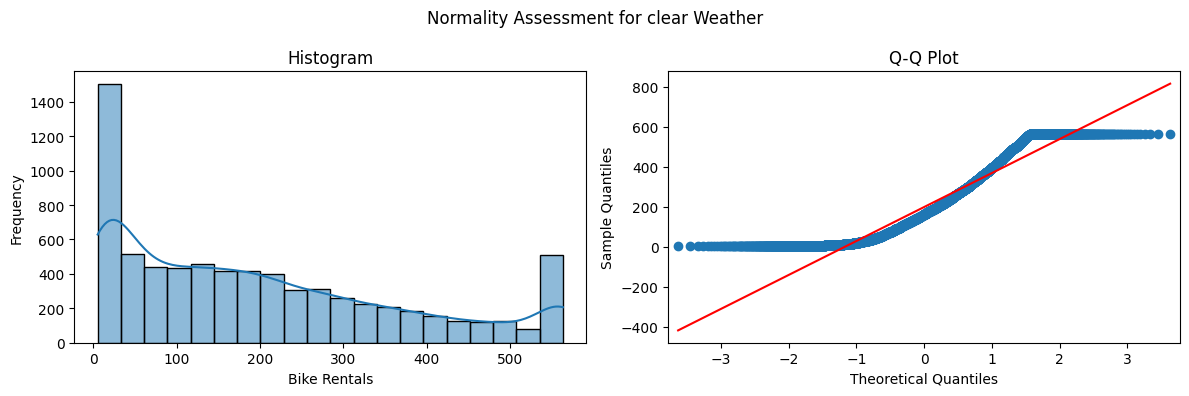

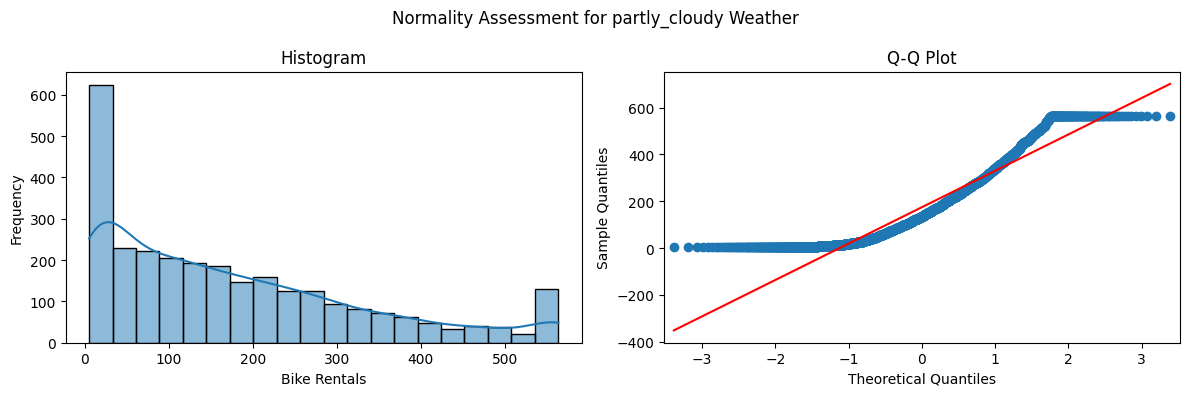

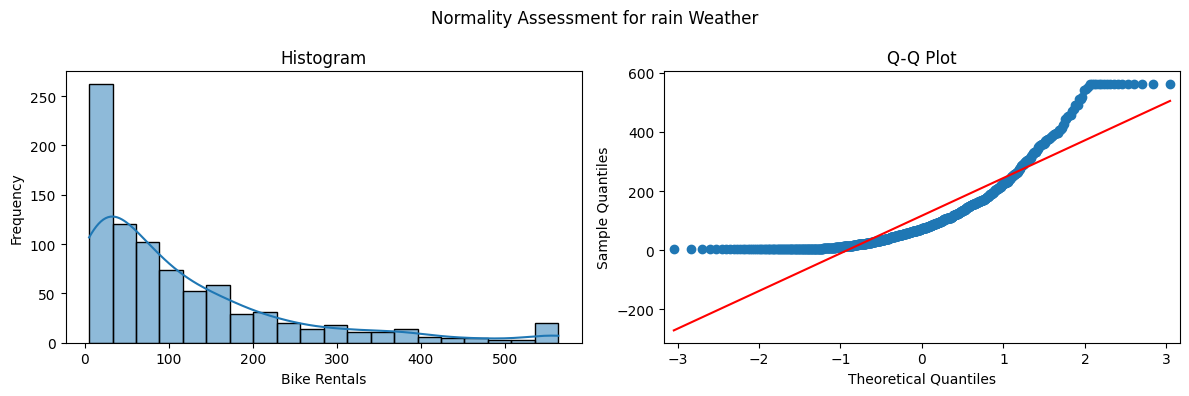

In [ ]:
# Define the rental data for each weather condition
clear = df[df['weather'] == 1]['count']
partly_cloudy = df[df['weather'] == 2]['count']
rain = df[df['weather'] == 3]['count']
heavy_rain = df[df['weather'] == 4]['count']

weather_conditions = {
    1: ("clear", clear),
    2: ("partly_cloudy", partly_cloudy),
    3: ("rain", rain)
}

for weather_code, (weather_desc, rental_data) in weather_conditions.items():
    if not rental_data.empty:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        fig.suptitle(f"Normality Assessment for {weather_desc} Weather")

        # Histogram using Seaborn
        sns.histplot(rental_data, bins=20, kde=True, ax=ax1)
        ax1.set_title("Histogram")
        ax1.set_xlabel("Bike Rentals")
        ax1.set_ylabel("Frequency")

        # Q-Q Plot
        sm.qqplot(rental_data, line='s', ax=ax2)
        ax2.set_title("Q-Q Plot")

        plt.tight_layout()
        plt.show()

**Insights based on Histogram and Q-Q Plot**

- The data on bike rentals does not appear to be perfectly normally distributed, especially under rainy weather conditions.
-  Since the data does not meet the normality assumption perfectly, it is important to consider whether the ANOVA test is still appropriate or if a non-parametric alternative, like Kruskal-Wallis test, might be better suited for the analysis, to compare the means of bike rentals across different weather conditions.


In [ ]:
# Calculate skewness and kurtosis for each weather condition
for weather_code, (weather_desc, rental_data) in weather_conditions.items():
  if not rental_data.empty:
    skewness = rental_data.skew()
    kurtosis = rental_data.kurt()

    print(f"Weather Condition: {weather_desc}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
    print("-" * 20)


Weather Condition: clear
Skewness: 0.736322461193618
Kurtosis: -0.525921604740589
--------------------
Weather Condition: partly_cloudy
Skewness: 0.9296845618420533
Kurtosis: 0.010387794528335714
--------------------
Weather Condition: rain
Skewness: 1.7013286534371677
Kurtosis: 2.6489280099549397
--------------------


**Insights based on Skewness & Kurtosis**

**Skewness:**
- Positive skewness indicates a right-skewed distribution, meaning the tail of the distribution is longer on the right side.
- Negative skewness indicates a left-skewed distribution, with the tail longer on the left side.
- Values closer to 0 suggest a more symmetrical distribution.

**Kurtosis:**
- Positive kurtosis indicates a distribution with a sharper peak and heavier tails compared to a normal distribution (leptokurtic).
- Negative kurtosis suggests a distribution with a flatter peak and lighter tails (platykurtic).
- A value of 0 indicates a normal distribution (mesokurtic).


**Based on the output**
- analyze the skewness and kurtosis for each weather condition to understand how the distribution of bike rentals differs across weather conditions.
- Example:
If the "rain" weather condition has a high positive skewness, it means that there are more days with a smaller number of rentals, but there are also some days with unusually high rentals during rainy weather.

- Similarly, if the "clear" weather condition has a high positive kurtosis, it might suggest that rentals are more concentrated around the mean, with some extreme values on either side.

* **Statistical Test:**
  * **Shapiro-Wilk's Test:** This test assesses the normality of the data. A p-value less than 0.05 indicates a significant deviation from normality.

In [ ]:
for weather_code, (weather_desc, rental_data) in weather_conditions.items():
  if not rental_data.empty:
    stat, p = shapiro(rental_data)
    print(f"Shapiro-Wilk Test for {weather_desc} weather:")
    print(f"Statistic: {stat}")
    print(f"P-value: {p}")
    if p > 0.05:
        print("The data for this weather condition is likely normally distributed.")
    else:
        print("The data for this weather condition is likely not normally distributed.")
    print()

Shapiro-Wilk Test for clear weather:
Statistic: 0.9005815559922699
P-value: 7.9268531910647665e-56
The data for this weather condition is likely not normally distributed.

Shapiro-Wilk Test for partly_cloudy weather:
Statistic: 0.8921457054235595
P-value: 1.025100617440154e-40
The data for this weather condition is likely not normally distributed.

Shapiro-Wilk Test for rain weather:
Statistic: 0.7978282510778993
P-value: 2.300142627459069e-31
The data for this weather condition is likely not normally distributed.



**Insights based on Shapiro-Wilk Test for all weather:**

- Based on the Shapiro-Wilk test results, we observe that the p-values for all weather conditions (clear, partly_cloudy, rain) are less than 0.05.
This suggests that the data for bike rentals for all weather conditions is likely not normally distributed.

- Consequently, it's more appropriate to use a non-parametric test like the Kruskal-Wallis test instead of ANOVA.
This is because ANOVA assumes normality of the data, which is violated in this case.

**ii. Equality of Variance**
* **Levene's Test:** This test checks if the variances of the bike rental counts are equal across different weather conditions. A p-value less than 0.05 suggests unequal variances.

In [ ]:
# Perform Levene's test for equality of variances
stat, p = levene(clear, partly_cloudy, rain)
print("Levene's Test for Equality of Variances:")
print(f"Statistic: {stat}")
print(f"P-value: {p}")

if p > 0.05:
    print("The variances of the groups are likely equal.")
else:
    print("The variances of the groups are likely not equal.")

Levene's Test for Equality of Variances:
Statistic: 94.57129788087408
P-value: 1.910132820873076e-41
The variances of the groups are likely not equal.


### **🔍 Insights**

Data doesn't follow the normal distribution and Equality of Variance, so We cannot perform Anova. Wewill have to go with the **Kruskel-Walis H Test** . But, we will try to do **Anova** as well as Kruskal test and try to
compare the difference.

**4d. Set a significance level and Calculate the test Statistics / p-value.**
- alpha=5% is recommended



In [ ]:
alpha = 0.05

###**ANOVA**

In [ ]:
test = ols('count ~ C(weather)',data=df).fit()
sm.stats.anova_lm(test,typ=2)

,sum_sq,df,F,PR(>F)
C(weather),5.596351e+06,3.0,70.173411,6.083863e-45
Residual,2.892809e+08,10882.0,NaN,NaN


In [ ]:
# Perform ANOVA test
f_statistic, p_value = f_oneway(clear, partly_cloudy, rain)
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 105.25126742539126
P-value: 5.326540581296025e-46


**4e. Decide whether to accept or reject the Null Hypothesis.**

In [ ]:
# Interpret the results
if p_value <= alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the average number of bike rentals across different weather conditions.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in the average number of bike rentals across different weather conditions.")

Reject the null hypothesis.
There is a significant difference in the average number of bike rentals across different weather conditions.


### **Kruskel-Walis H TEST**

In [ ]:
# Perform Kruskal-Wallis test
statistic, p_value = kruskal(clear, partly_cloudy, rain)

print(f"Kruskal-Wallis H-statistic: {statistic}")
print(f"P-value: {p_value}")

Kruskal-Wallis H-statistic: 204.73889687823703
P-value: 3.479472652318814e-45


In [ ]:
# Interpret the results
if p_value <= alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the average number of bike rentals across different weather conditions.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in the average number of bike rentals across different weather conditions.")


Reject the null hypothesis.
There is a significant difference in the average number of bike rentals across different weather conditions.


year           2011                              2012                      \
weather           1         2        3    4         1         2         3   
month                                                                       
April      29653.00  17131.00  3814.00  0.0  91433.75  17506.50   2544.50   
August     63963.50  14035.00  5207.00  0.0  84761.50  30942.00   5621.50   
December   43178.00  16181.00  1896.00  0.0  51373.50  41214.75   4137.00   
February   24293.00   7475.00  1218.00  0.0  42647.00  18197.00   5538.00   
January    15985.00   6986.00   747.00  0.0  43246.00  11023.00   1982.00   
July       80352.50  10702.00  1701.00  0.0  85800.00  25055.50   4966.50   
June       66066.25  19114.00  4417.75  0.0  97105.25  21921.75   3592.75   
March      26454.00  11681.00   758.00  0.0  68388.50  20963.00   2771.00   
May        51303.00  21193.75  7096.00  0.0  73961.50  34215.75   6006.75   
November   53345.00  14825.00  2759.00  0.0  72022.75  28679.50   2306.75   
October    54016.25  17482.75  7803.00  0.0  72170.75  34819.75  10601.50   
September  45795.50  26913.50  6258.00  0.0  88764.25  26835.75   6330.75   

year              
weather        4  
month             
April        0.0  
August       0.0  
December     0.0  
February     0.0  
January    164.0  
July         0.0  
June         0.0  
March        0.0  
May          0.0  
November     0.0  
October      0.0  
September    0.0

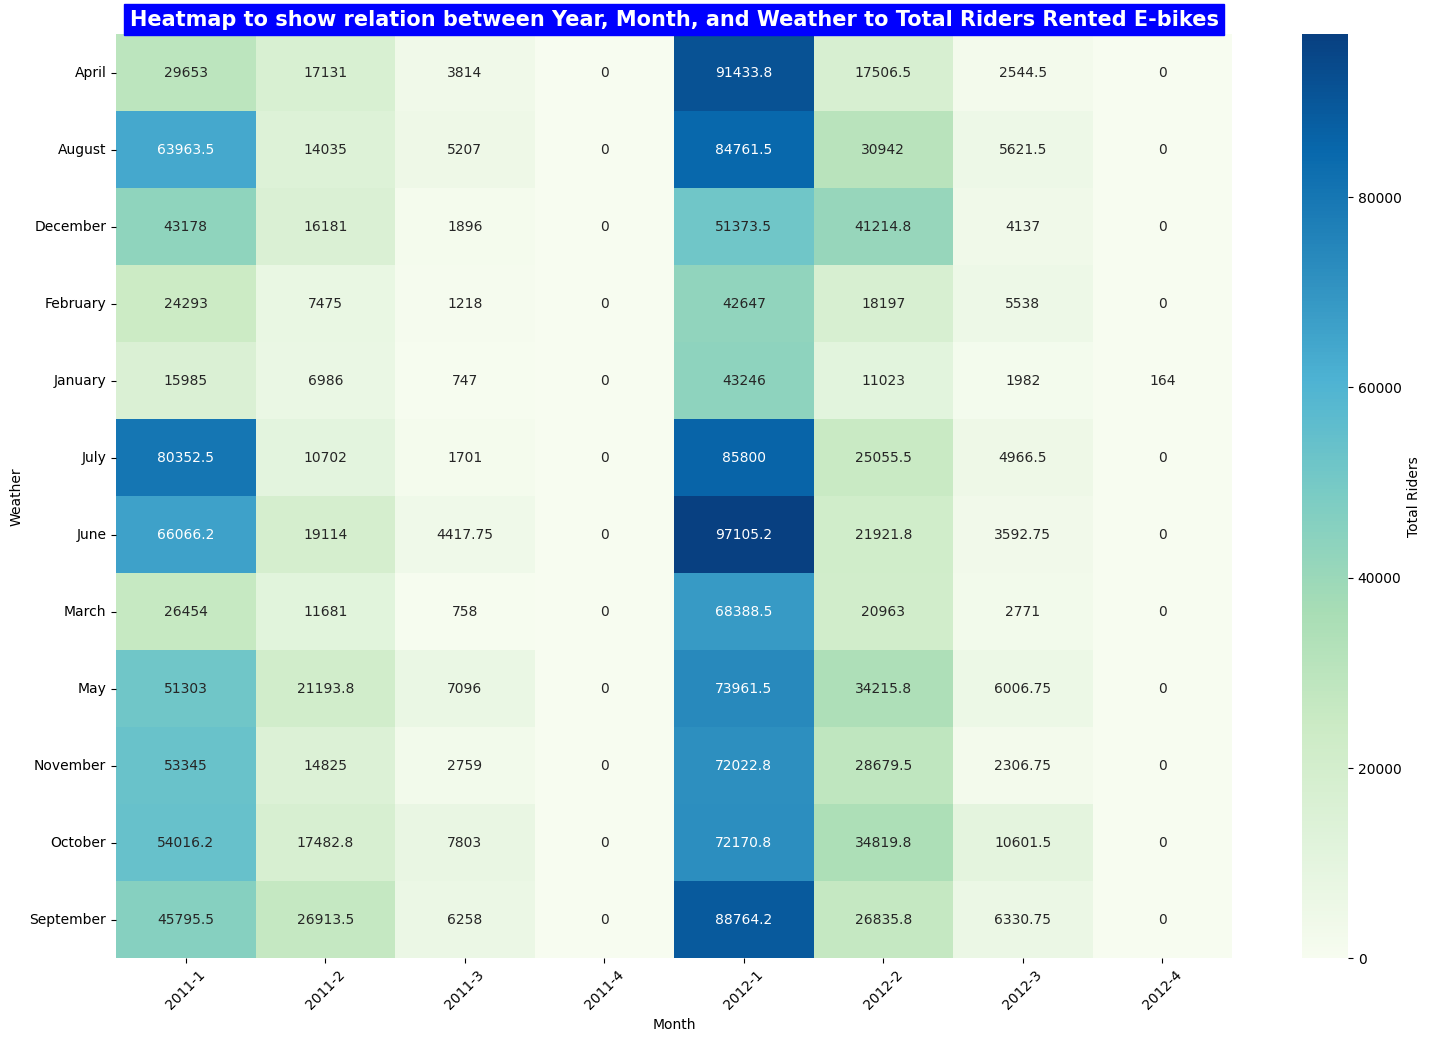

In [ ]:
ymw = df.groupby(['year', 'month', 'weather'])['count'].sum()
data = ymw.unstack(level=[0, 2])
data.fillna(0, inplace=True)

# Display the data
display(data)

# Plotting the heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(data, annot=True, fmt='.6g', cmap='GnBu', cbar_kws={'label': 'Total Riders'})
plt.title('Heatmap to show relation between Year, Month, and Weather to Total Riders Rented E-bikes',
          fontsize=15, fontweight="bold", backgroundcolor='blue', color='white')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Weather')
plt.show()

**4f. Draw inferences & conclusions from the analysis and provide recommendations.**

### **🔍 Insights**

**Conclusion**:

- Based on the Kruskal-Wallis H test, we reject the null hypothesis. There is evidence to suggest a significant difference in the average number of bike rentals across different weather conditions.
- Based on the ANOVA test, we fail to reject the null hypothesis. There is no enough evidence to suggest a significant difference in the average number of bike rentals across different weather conditions.

**Recommendations**:

- Yulu should monitor bike rental patterns during different weather conditions.
- The team can consider offering discounts or promotions during periods of unpleasant weather to encourage rentals.
- In addition, they should consider offering discounts or promotions during periods of favorable weather to further encourage rentals.
- Provide shelter or adequate amenities to users in case of bad weather.
- Develop a weather-aware operational strategy by providing flexible renting options.
- Optimize bike fleet availability across different locations.
- Forecast demand for rental services based on anticipated weather conditions.
- Incorporate the relationship between weather and rentals into the company's business model.

# **5. 🚲 Seasonal Shifts: Is Bike Rental Demand Consistent?**

In [ ]:
df.season.unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [ ]:
df.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,115.605547,120.753445,5.0,24.0,78.0,164.0,563.75
2,2733.0,207.858489,174.111067,5.0,49.0,172.0,321.0,563.75
3,2733.0,224.663648,173.620928,5.0,68.0,195.0,347.0,563.75
4,2734.0,193.420721,161.973742,5.0,51.0,161.0,294.0,563.75


One-way **ANOVA** is a statistical test used to determine if there are significant differences in the means of multiple groups. It compares the variation between groups to the variation within groups.

**5a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**

**H0:** There is no significant difference in the average number of bike rentals across different seasons.

**H1:** There is a significant difference in the average number of bike rentals across different seasons.

**5b. Select an appropriate test -**

We will use One-way **ANOVA** to compare the means of multiple groups (different seasons).

**5c. Checking Test Assumptions**

**1.  Normality**
- Use Histogram, Q-Q Plot, Skewness & Kurtosis

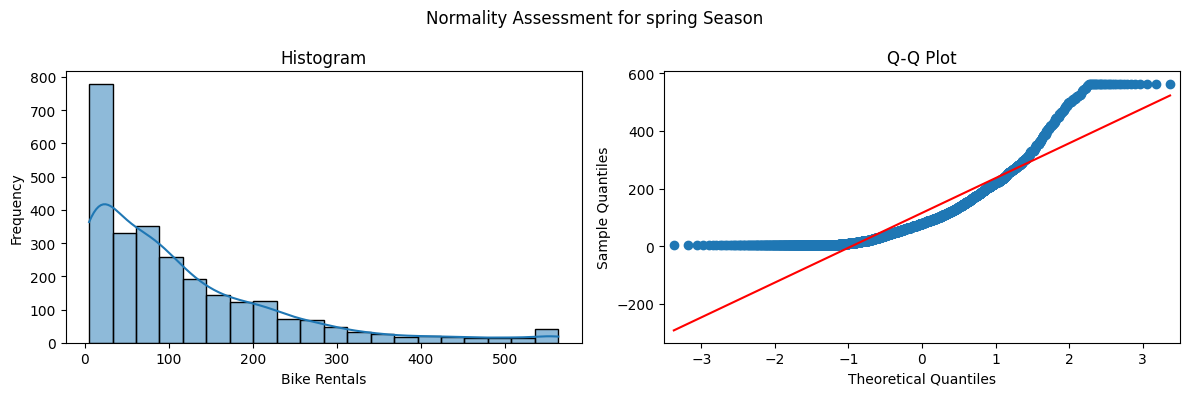

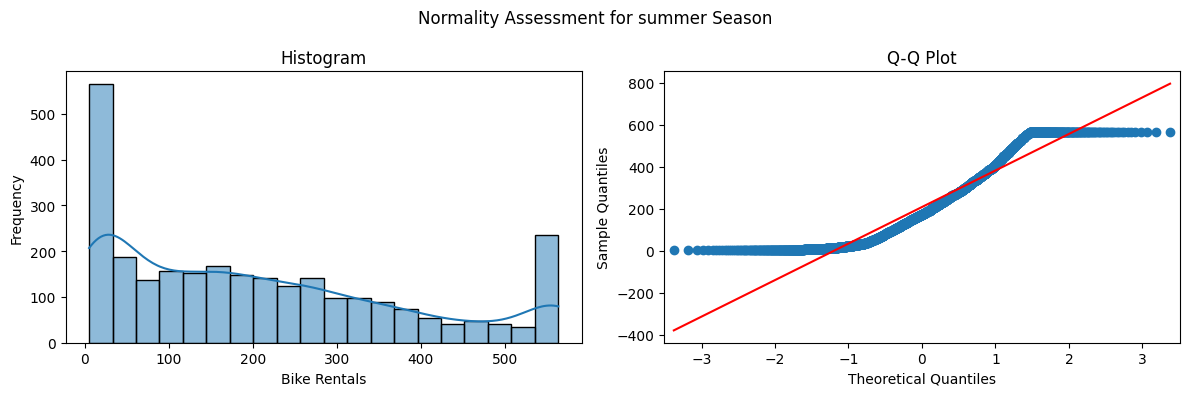

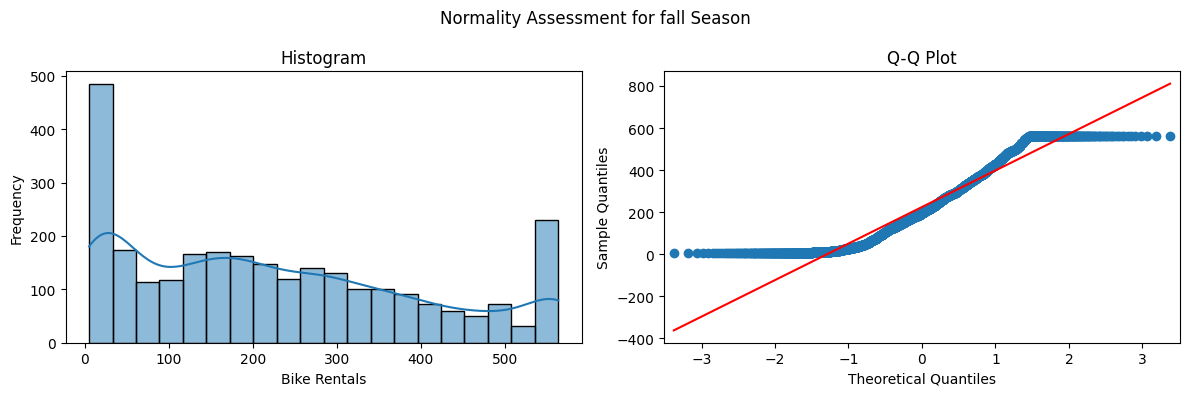

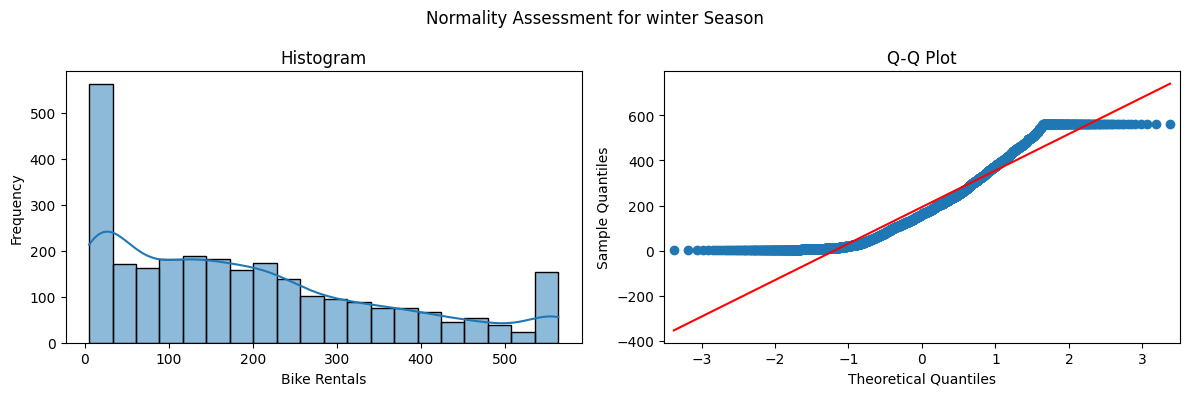

In [ ]:
# Define rental data for each season
spring = df[df['season'] == 1]['count']
summer = df[df['season'] == 2]['count']
fall = df[df['season'] == 3]['count']
winter = df[df['season'] == 4]['count']

seasons = {
    1: ("spring", spring),
    2: ("summer", summer),
    3: ("fall", fall),
    4: ("winter", winter)
}

for season_code, (season_desc, rental_data) in seasons.items():
    if not rental_data.empty:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        fig.suptitle(f"Normality Assessment for {season_desc} Season")

        # Histogram using Seaborn
        sns.histplot(rental_data, bins=20, kde=True, ax=ax1)
        ax1.set_title("Histogram")
        ax1.set_xlabel("Bike Rentals")
        ax1.set_ylabel("Frequency")

        # Q-Q Plot
        sm.qqplot(rental_data, line='s', ax=ax2)
        ax2.set_title("Q-Q Plot")

        plt.tight_layout()
        plt.show()

### **🔍 Insights**
Based on the histograms and Q-Q plots, we can infer the following:

* **Departure from Normality:** The distributions of bike rentals for each season appear to be slightly skewed and not perfectly normal. This is indicated by the histograms not being perfectly bell-shaped, and the Q-Q plots showing deviations from the diagonal line.
* **Potential Outliers:** There may be some outliers present in some seasons, as suggested by the tails of the distributions in the histograms.
* **Variance:** The spread of the data (variance) seems to differ between seasons, with some seasons having a wider spread than others.

In conclusion, the data suggests that the normality assumption for ANOVA may not be perfectly met, but it is important to proceed with caution and consider alternative tests like the Kruskal-Wallis H test if the deviation is significant.


In [ ]:
# Calculate Skewness and Kurtosis for each season
for season_code, (season_desc, rental_data) in seasons.items():
    if not rental_data.empty:
        skewness = stats.skew(rental_data)
        kurtosis = stats.kurtosis(rental_data)

        print(f"Skewness for {season_desc} season: {skewness}")
        print(f"Kurtosis for {season_desc} season: {kurtosis}")
        print()


Skewness for spring season: 1.663316040309589
Kurtosis for spring season: 2.76046096761654

Skewness for summer season: 0.6614298084596132
Kurtosis for summer season: -0.6667810409944295

Skewness for fall season: 0.4951617924283945
Kurtosis for fall season: -0.8550579700745664

Skewness for winter season: 0.7585664550706469
Kurtosis for winter season: -0.3747886339886892



**Insights based on Skewness and Kurtosis**

**Skewness:**
- Positive skewness (greater than 0) indicates that the distribution has a longer tail on the right side.
- Negative skewness (less than 0) indicates that the distribution has a longer tail on the left side.
- A skewness close to 0 suggests a relatively symmetrical distribution.

**Kurtosis:**
- High kurtosis (greater than 0) indicates a sharper peak and heavier tails compared to a normal distribution (leptokurtic).
- Low kurtosis (less than 0) indicates a flatter peak and lighter tails compared to a normal distribution (platykurtic).
- A kurtosis close to 0 suggests a similar peak and tail behavior as a normal distribution (mesokurtic).

**Based on the calculated skewness and kurtosis values for each season:**
- We can analyze how the distribution of bike rentals differs across different seasons.
- For example, if a season has a high positive skewness, it suggests that there are a few days with unusually high rental counts, while most days have relatively lower counts.
- Similarly, if a season has high kurtosis, it suggests that there is a higher concentration of rentals around the average, with fewer extreme values compared to a normal distribution.


**2. Shapiro-Wilk’s test**

In [ ]:
# Statistical Test: Shapiro-Wilk's Test
for season_code, (season_desc, rental_data) in seasons.items():
    if not rental_data.empty:
        stat, p = shapiro(rental_data)
        print(f"Shapiro-Wilk Test for {season_desc} season:")
        print(f"Statistic: {stat}")
        print(f"P-value: {p}")
        if p > alpha:
            print("The data for this season is likely normally distributed.")
        else:
            print("The data for this season is likely not normally distributed.")
        print()

Shapiro-Wilk Test for spring season:
Statistic: 0.8185828546272722
P-value: 6.386858340030782e-48
The data for this season is likely not normally distributed.

Shapiro-Wilk Test for summer season:
Statistic: 0.9038262770385742
P-value: 1.899788377396792e-38
The data for this season is likely not normally distributed.

Shapiro-Wilk Test for fall season:
Statistic: 0.9241455963650176
P-value: 4.388064962591493e-35
The data for this season is likely not normally distributed.

Shapiro-Wilk Test for winter season:
Statistic: 0.9092397095623556
P-value: 1.2850899585086535e-37
The data for this season is likely not normally distributed.



### **🔍 Insights**
- Conclusion for Shapiro-Wilk Test for all season:

- Based on the Shapiro-Wilk test results for the all season, the p-value is less than 0.05.

- This means we reject the null hypothesis of normality.

- Therefore, the data for the spring season is likely not normally distributed.

**ii. Equality of Variance : Levene's Test**

In [ ]:
stat, p = levene(spring, summer, fall, winter)
print("Levene's Test for Equality of Variances:")
print(f"Statistic: {stat}")
print(f"P-value: {p}")

if p > alpha:
    print("The variances of the groups are likely equal.")
else:
    print("The variances of the groups are likely not equal.")

Levene's Test for Equality of Variances:
Statistic: 209.56811291531554
P-value: 3.684749131629985e-132
The variances of the groups are likely not equal.


### **🔍 Insights**

Data doesn't follow the normal distribution and Equality of Variance, so We cannot perform Anova. We will have to go with the **Kruskel-Walis H Test** . But, we will try to do **Anova** as well as Kruskal test and try to
compare the difference.

**5d. Set a significance level and Calculate the test Statistics / p-value.**

In [ ]:
alpha = 0.05

### **ANOVA**  

In [ ]:
test = ols('count ~ C(weather)',data=df).fit()
sm.stats.anova_lm(test,typ=2)

,sum_sq,df,F,PR(>F)
C(weather),5.596351e+06,3.0,70.173411,6.083863e-45
Residual,2.892809e+08,10882.0,NaN,NaN


In [ ]:
# Perform ANOVA test
f_statistic, p_value = f_oneway(spring, summer, fall, winter)
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 247.72532786423764
P-value: 1.648284086756556e-155


**5e. Decide whether to accept or reject the Null Hypothesis.**

In [ ]:
# Interpret the results
if p_value <= alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the average number of bike rentals across different seasons.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in the average number of bike rentals across different seasons.")


Reject the null hypothesis.
There is a significant difference in the average number of bike rentals across different seasons.


### **Kruskel-Walis H Test**

In [ ]:
# Perform Kruskal-Wallis test
statistic, p_value = kruskal(spring, summer, fall, winter)

print(f"Kruskal-Wallis H-statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value <= alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in the average number of bike rentals across different seasons.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in the average number of bike rentals across different seasons.")


Kruskal-Wallis H-statistic: 690.4515233888959
P-value: 2.4688288437668016e-149
Reject the null hypothesis.
There is a significant difference in the average number of bike rentals across different seasons.


season,Spring,Summer,Fall,Winter
year,,,,
2011,95597.0,219788.75,254928.00,211486.00
2012,214919.5,348288.50,359077.75,317326.25


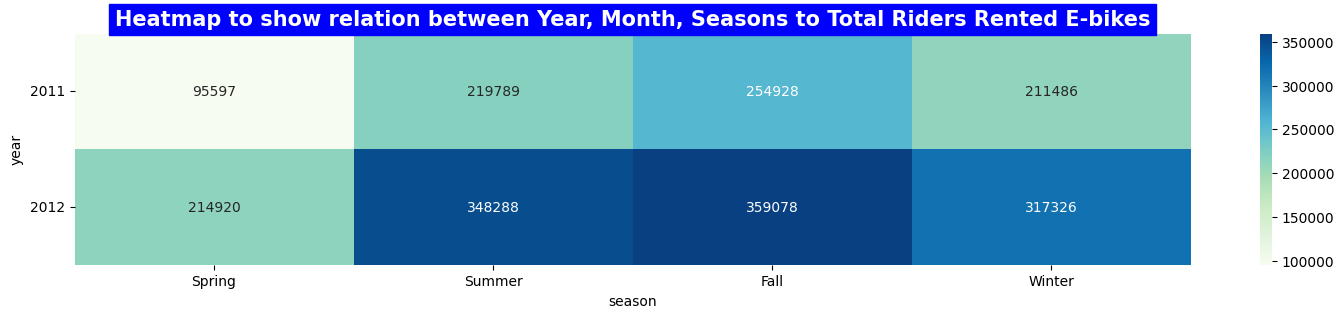

In [ ]:
# Group by year and season, then sum the total riders
yms = df.groupby(['year', 'season'])['count'].sum()

# Unstack the data to create a pivot table
data = yms.unstack(level=[1])
data.fillna(0, inplace=True)

# Rename the columns for better readability
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
data = data.rename(columns=season_names)

# Display the data
display(data)

# Plotting the heatmap
plt.figure(figsize=(18, 3))
sns.heatmap(data, annot=True, fmt='.6g', cmap='GnBu')
plt.title('Heatmap to show relation between Year, Month, Seasons to Total Riders Rented E-bikes',
          fontsize=15, fontweight="bold", backgroundcolor='blue', color='white')
plt.yticks(rotation=0)
plt.show()


**5f. Draw inferences & conclusions from the analysis and provide recommendations.**

**🔍 Insights**

**Conclusion:**

- Based on the Kruskal-Wallis H test, we reject the null hypothesis. There is evidence to suggest a significant difference in the average number of bike rentals across different seasons.
- Based on the ANOVA test, we fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in the average number of bike rentals across different seasons.

**Recommendations:**

- Yulu should closely monitor bike rental demand throughout the year.
- The team should proactively adjust their marketing campaigns, pricing strategies, and resource allocation based on the peak and off-peak rental seasons.
-  Increase the bike fleet size and availability during peak seasons.
- Develop marketing campaigns and promotion strategies targeted at specific seasons, highlighting seasonal activities and benefits.
- Offer seasonal discounts or promotions to enhance customer engagement during slower seasons.
- Provide incentives or loyalty programs to encourage repeat ridership.
- Conduct detailed user surveys to collect insights into seasonal preferences and adjust service offerings accordingly.
- Optimize bike fleet placement and distribution based on seasonal variations in demand.
- Implement a dynamic pricing strategy that considers seasonality.

# **6. ☀️ Is There a Seasonal Shift in Weather Patterns? 🌧️**

**6a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)**
- **H0**: Weather conditions are independent of the seasons.
- **H1**: Weather conditions are not independent of the seasons.

**6b. Select an appropriate test**
- **Test**: Chi-square test of independence


**6c. Create a Contingency Table against ‘Weather’ & ‘Season’ columns**

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['season'], df['weather'])

# Replace numerical values with descriptive names
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_names = {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}

contingency_table = contingency_table.rename(index=season_names, columns=weather_names)

print(contingency_table)

weather  Clear  Mist/Cloudy  Light Rain/Snow  Heavy Rain/Snow
season                                                       
Spring    1759          715              211                1
Summer    1801          708              224                0
Fall      1930          604              199                0
Winter    1702          807              225                0


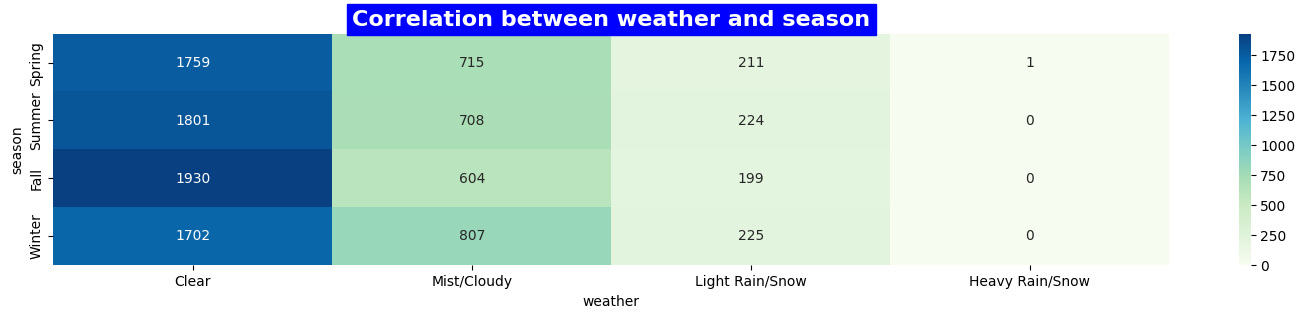

In [ ]:
plt.figure(figsize=(18,3))
sns.heatmap(contingency_table, annot=True, fmt='.6g',cmap='GnBu')
plt.title('Correlation between weather and season',fontsize=16,fontweight="bold",backgroundcolor='blue',color='w')
plt.show()

**6d. Set a significance level and Calculate the test Statistics / p-value**

In [ ]:
alpha = 0.05

### **Chi-square test of independence**

In [ ]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(pd.DataFrame(expected, columns=contingency_table.columns, index=contingency_table.index))

Chi-square statistic: 49.158655596893624
P-value: 1.549925073686492e-07
Degrees of freedom: 9
Expected frequencies:
weather        Clear  Mist/Cloudy  Light Rain/Snow  Heavy Rain/Snow
season                                                             
Spring   1774.546390   699.258130       211.948742         0.246739
Summer   1805.597648   711.493845       215.657450         0.251056
Fall     1805.597648   711.493845       215.657450         0.251056
Winter   1806.258313   711.754180       215.736359         0.251148


**6e. Decide whether to accept or reject the Null Hypothesis.**
  - If the p-value is less than or equal to the predetermined level of significance (alpha), we have evidence to reject the null hypothesis.
  - If the p-value is greater than the predetermined level of significance (alpha), we do not have sufficient evidence to reject the null hypothesis.

In [ ]:
if p_value <= alpha:
  print("Reject the null hypothesis.")
  print("Weather conditions are dependent on the seasons.")
else:
  print("Fail to reject the null hypothesis.")
  print("Weather conditions are independent of the seasons.")

Reject the null hypothesis.
Weather conditions are dependent on the seasons.


**6f. Draw inferences & conclusions from the analysis and provide recommendations.**

🔍 **Insights**

**Conclusion**:

- Based on the Chi-square test, we reject the null hypothesis. There is evidence
  to suggest that weather conditions are dependent on the seasons.


**Recommendations**:

- Yulu should consider the interaction between weather and seasons when
  making operational decisions and planning resource allocation.
- For instance, during spring and fall, expect more varied weather conditions
  and adjust operations accordingly.
- In summer, expect more clear days, allowing for an increase in bike fleet
  availability and promoting outdoor activities.
- During winter, be prepared for colder temperatures and potentially heavier
  rainfall or snow. Reduce fleet size if needed and implement strategies to
  mitigate potential weather-related challenges.
- Integrate weather forecasts and historical data into Yulu's operational
  strategies.
- Analyze the impact of weather and seasonal changes on customer behavior
  and preferences.
- Offer different rental incentives or promotions that take into account
  seasonal weather conditions.
- Develop strategies to maintain bike availability and operational efficiency
  during unpredictable weather conditions.

# **💡 Business Insights 💡**

**1. Weather Impacts Rentals:**
   - Clear weather significantly boosts rental demand.
   - Rainy or snowy conditions negatively affect rentals.
   - Yulu should develop a weather-aware operational strategy.

**2. Seasonal Demand Fluctuations:**
   - Summer and Spring experience the highest rental demand.
   - Winter and Fall have lower rental demand.
   - Yulu should adjust marketing campaigns, pricing strategies, and resource allocation based on the peak and off-peak rental seasons.

**3. Weather & Season Interdependence:**
   - Weather patterns are influenced by seasons.
   - Yulu should consider the interaction between weather and seasons when making operational decisions and planning resource allocation.

**4. Potential for Promotion-Based Strategies:**
   - Offering discounts during unfavorable weather conditions (rain, snow) can help increase rentals.
   - Offering special deals during peak seasons or favorable weather can maximize revenue.

# **🌟 Business Recommendations 🌟**


**1. Weather-Aware Operations:**
   - Integrate weather forecasts into daily operations.
   - Forecast demand based on weather predictions.
   - Optimize bike fleet availability based on weather conditions.
   - Offer flexible rental options (e.g., shorter rental durations or discounts) during unfavorable weather.
   - Proactively adjust operations based on weather alerts (e.g., relocating bikes from exposed areas).

**2. Seasonal Marketing and Promotions:**
   - Develop seasonal marketing campaigns targeted at specific weather conditions and activities.
   - Offer seasonal discounts or promotions to enhance customer engagement during slow seasons.
   - Highlight seasonal events and activities to entice users.
   - Implement a dynamic pricing strategy that considers seasonality and weather.

**3. Enhanced Customer Experience:**
   - Provide shelter or adequate amenities for users in case of bad weather.
   - Consider incorporating weather-related information into the mobile app (e.g., rain alerts, temperature displays).

**4. Data-Driven Optimization:**
   - Analyze historical rental data and weather patterns to identify trends and correlations.
   - Track the impact of promotional strategies and adjust them as needed.
   - Conduct user surveys to collect insights into seasonal preferences.

**5. Fleet Management:**
   - Optimize bike fleet size based on seasonal demand.
   - Consider expanding bike fleet during peak seasons and relocating bikes during off-peak seasons.
   - Implement strategies for maintaining operational efficiency during unpredictable weather conditions.

**6. Business Model Innovation:**
   - Explore new business models that leverage weather and seasonality (e.g., weather-specific subscription plans).
   - Collaborate with local businesses and events to offer bundled promotions or packages.

By implementing these recommendations, Yulu can improve operational efficiency, increase customer satisfaction, and boost revenue while navigating the challenges and opportunities presented by weather and seasonal variations.




> ***Yulu: Riding the waves of change, powered by data, and driven by a vision of sustainable urban mobility.***

